###  <font size=5 color='orange'> EDA & Data Preprocessing on Google App Store Rating Dataset

###  <font size=4 color='blue'> Attribute Information :

|SL.No | |Attribute  |   |Description                   |
|:-----| |:-----------|    |:----------------------------|
|1     | |App|      |Application name|
|2     | |Category      |   |Category the app belongs to|
|3     | |Rating |   |Overall user rating of the app|
|4     | |Size| |Size of the app|
|5     | |Installs|  |Number of user reviews for the app|
|6     | |Type|    |Paid or Free|
|7     | |Price|         |Price of the app|
|8     | |ContentRating|      |Age group the app is targeted at - children/Mature 21+ /Adult|
|9     | |Genres|       |An app can belong to multiple genres (apart from its main category)For eg.
|      | |       |      |a musical family game will belong to Music, Game, Family genres|
|10    | |Last Updated|          |Date when the app was last updated on play store|
|11    | |Current ver|   |Current version of the app available on play store|
|12    | |Android ver|      |Min required Android Version|

###  <font size=4 color='blue'> Objective : 
 ### The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

### <font color='purple'><b> 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("Google Playstore Appdata.csv")
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### <font color='purple'><b> 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
df1.shape

(10841, 13)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df1.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [6]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### <font color='purple'><b>3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [8]:
df1.describe(include='object').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [9]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### <font color='purple'><b>4. Check if there are any duplicate records in the dataset? if any drop them.

In [10]:
df1.duplicated().any()

True

In [11]:
df1.drop_duplicates(inplace=True)

In [12]:
df1.duplicated().any()

False

In [13]:
df1.shape

(10358, 13)

### <font color='purple'><b>5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [14]:
df1['Category'].unique()   

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
## We can remove 1.9 because, this is an int type rest of them are string type

In [15]:
index_names = df1[ df1['Category'] == '1.9' ].index
df1.drop(index_names, inplace = True) 

In [16]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### <font color='purple'><b>6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low).

In [17]:
df1.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [18]:
df1.tail()  ## For example we can note in Rating column there is some Nan values is obtained.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
## There are nearly 1500 rows are having missing values, we can't remove them because it may affect the data,
## so fill the null values with 0 , it may give better.

In [19]:
df1.fillna(value=0, inplace=True) 

In [20]:
df1.tail()  ## we can note in Rating column the Nan values is replaced with 0.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [21]:
## creating a new column Rating Category with the help of column rating

In [22]:
df1['Rating_category'] = np.where(df1['Rating']>3.5, 'High', 'Low')

In [23]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


### <font color='purple'><b>7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

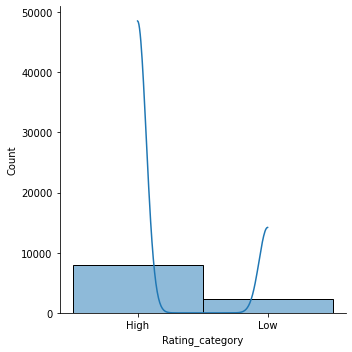

In [24]:
sns.displot(df1["Rating_category"],kde=True)

### <font color='purple'><b>8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation).

In [25]:
df1["Reviews"] = df1["Reviews"].astype("int")

<AxesSubplot: >

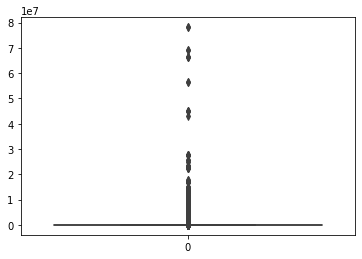

In [26]:
sns.boxplot(df1["Reviews"])

<AxesSubplot: >

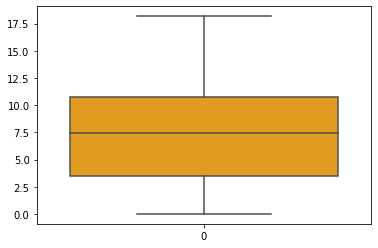

In [27]:
df1['Reviews'] = np.log(df1['Reviews'])
sns.boxplot(df1["Reviews"],color = 'orange')

### <font color='purple'><b>9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries wheresize='Varies with device').

In [28]:
df1.shape

(10357, 14)

In [29]:
index_names = df1[ df1['Size'] == 'Varies with device' ].index
df1.drop(index_names, inplace = True)

In [30]:
df1.shape

(8831, 14)

In [31]:
df1['Size'] = df1['Size'].replace({'M': 'e+06', 'k': 'e+03'}, regex=True).astype(float).astype(int)

In [32]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


### <font color='purple'><b>10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [33]:
df1['Installs'] = df1['Installs'].str.replace(',','')
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000,10000+,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000,500000+,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000,5000000+,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000,50000000+,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000,100000+,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [34]:
df1["Installs"] = [x.strip("+") for x in df1["Installs"]]

In [35]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


### <font color='purple'><b>11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [36]:
df1["Price"].value_counts() ## Before droping $ 

0          8140
$0.99       143
$2.99       111
$1.99        66
$4.99        63
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [37]:
df1["Price"] = [x.strip("$") for x in df1["Price"]]

In [38]:
df1["Price"].value_counts()  ## After droping $ 

0         8140
0.99       143
2.99       111
1.99        66
4.99        63
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: Price, Length: 87, dtype: int64

### <font color='purple'><b>12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis).

In [39]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [40]:
df1.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [41]:
df1

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000,10000,Free,0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000,500000,Free,0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000,5000000,Free,0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000,50000000,Free,0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000,100000,Free,0,Everyone,High
...,...,...,...,...,...,...,...,...
10835,BUSINESS,-inf,9600000,10,Free,0,Everyone,Low
10836,FAMILY,3.637586,53000000,5000,Free,0,Everyone,High
10837,FAMILY,1.386294,3600000,100,Free,0,Everyone,High
10838,MEDICAL,1.098612,9500000,1000,Free,0,Everyone,Low


### <font color='purple'><b>13. Encode the categorical columns.

In [42]:
df1

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000,10000,Free,0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000,500000,Free,0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000,5000000,Free,0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000,50000000,Free,0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000,100000,Free,0,Everyone,High
...,...,...,...,...,...,...,...,...
10835,BUSINESS,-inf,9600000,10,Free,0,Everyone,Low
10836,FAMILY,3.637586,53000000,5000,Free,0,Everyone,High
10837,FAMILY,1.386294,3600000,100,Free,0,Everyone,High
10838,MEDICAL,1.098612,9500000,1000,Free,0,Everyone,Low


In [43]:
## Before Encode we can note _____
## There is some inf values obtained in Reviews column
## We can remove that immediately or replace with 0.

In [44]:
su1 = df1['Reviews'].value_counts().index.tolist()
print(su1)

[-inf, 0.0, 0.6931471805599453, 1.0986122886681098, 1.3862943611198906, 1.6094379124341003, 1.791759469228055, 1.9459101490553132, 2.0794415416798357, 2.1972245773362196, 2.302585092994046, 2.4849066497880004, 2.3978952727983707, 2.5649493574615367, 2.833213344056216, 2.9444389791664403, 2.6390573296152584, 2.772588722239781, 2.995732273553991, 3.044522437723423, 2.70805020110221, 3.2188758248682006, 3.1780538303479458, 3.6375861597263857, 3.4011973816621555, 2.8903717578961645, 3.091042453358316, 3.295836866004329, 3.1354942159291497, 3.4965075614664802, 3.332204510175204, 3.713572066704308, 3.258096538021482, 3.4657359027997265, 3.367295829986474, 3.4339872044851463, 3.6635616461296463, 3.6109179126442243, 3.8066624897703196, 3.9889840465642745, 3.871201010907891, 3.5553480614894135, 3.58351893845611, 3.784189633918261, 3.6888794541139363, 3.7612001156935624, 3.970291913552122, 4.1588830833596715, 3.9512437185814275, 4.204692619390966, 3.5263605246161616, 4.007333185232471, 4.2341065

In [45]:
df1.replace([np.inf, -np.inf], 0, inplace=True)

In [46]:
df1

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000,10000,Free,0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000,500000,Free,0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000,5000000,Free,0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000,50000000,Free,0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000,100000,Free,0,Everyone,High
...,...,...,...,...,...,...,...,...
10835,BUSINESS,0.000000,9600000,10,Free,0,Everyone,Low
10836,FAMILY,3.637586,53000000,5000,Free,0,Everyone,High
10837,FAMILY,1.386294,3600000,100,Free,0,Everyone,High
10838,MEDICAL,1.098612,9500000,1000,Free,0,Everyone,Low


In [47]:
df1["Category"] = df1["Category"].map({'ART_AND_DESIGN':1, 'AUTO_AND_VEHICLES':2, 'BEAUTY':3,
       'BOOKS_AND_REFERENCE':4, 'BUSINESS':5, 'COMICS':6, 'COMMUNICATION':7,
       'DATING':8, 'EDUCATION':9, 'ENTERTAINMENT':10, 'EVENTS':11, 'FINANCE':12,
       'FOOD_AND_DRINK':13, 'HEALTH_AND_FITNESS':14, 'HOUSE_AND_HOME':15,
       'LIBRARIES_AND_DEMO':16, 'LIFESTYLE':17, 'GAME':18, 'FAMILY':19, 'MEDICAL':20,
       'SOCIAL':21, 'SHOPPING':22, 'PHOTOGRAPHY':23, 'SPORTS':24, 'TRAVEL_AND_LOCAL':25,
       'TOOLS':26, 'PERSONALIZATION':27, 'PRODUCTIVITY':28, 'PARENTING':29, 'WEATHER':30,
       'VIDEO_PLAYERS':31, 'NEWS_AND_MAGAZINES':32, 'MAPS_AND_NAVIGATION':33})

In [48]:
df1["Category"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [49]:
df1["Type"] = df1["Type"].map({'Free':1,'Paid':2})

In [50]:
df1["Type"].unique()

array([1, 2], dtype=int64)

In [51]:
df1["Content Rating"] = df1["Content Rating"].map({'Everyone':1, 'Teen':2, 'Everyone 10+':3, 'Mature 17+':4,
       'Adults only 18+':5, 'Unrated':6})

In [52]:
df1["Content Rating"].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [53]:
df1["Rating_category"]= df1["Rating_category"].map({'High':1,'Low':2})

In [54]:
df1["Rating_category"].unique()

array([1, 2], dtype=int64)

### <font color='purple'><b>14. Segregate the target and independent features (Hint: Use Rating_category as the target.

In [55]:
Y=df1[["Rating_category"]]
X=df1.drop("Rating_category",axis=1)

### <font color='purple'><b>15. Split the dataset into train and test.

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [57]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
4386,17,6.313548,22000000,10000,1,0,1
2460,20,0.000000,4600000,10,1,0,1
3691,31,10.162847,6100000,50000000,1,0,1
5677,21,4.477337,4300000,1000,1,0,1
6591,20,8.107720,8300000,100000,1,0,1
...,...,...,...,...,...,...,...
4337,19,8.354910,13000000,1000000,1,0,1
9739,17,0.693147,28000000,500,1,0,1
1394,14,10.089718,18000000,1000000,1,0,1
6906,12,4.564348,7200000,10000,1,0,1


In [58]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
4789,26,4.477337,2000000,10000,2,1.99,1
4903,26,10.304074,5000000,1000000,1,0,1
9378,19,8.882253,32000000,1000000,1,0,1
9184,27,6.016157,6100000,100000,1,0,1
516,8,9.756610,40000000,500000,1,0,4
...,...,...,...,...,...,...,...
9154,19,10.941004,43000000,500000,2,4.99,1
1453,15,10.537707,40000000,1000000,1,0,1
8849,5,0.000000,28000000,100,1,0,1
3836,33,6.480045,3400000,100000,1,0,1


In [59]:
Y_train

,Rating_category
4386,2
2460,2
3691,1
5677,2
6591,1
...,...
4337,1
9739,2
1394,1
6906,1


In [60]:
Y_test

,Rating_category
4789,1
4903,2
9378,1
9184,1
516,1
...,...
9154,1
1453,1
8849,2
3836,1


### Regression (Coefficient , Intercept)

In [61]:
regression_model = LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

In [62]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Category is -0.00029341663635315416
The coefficient for Reviews is -0.061291559054321106
The coefficient for Size is 6.649462647168036e-10
The coefficient for Installs is 7.913458499597681e-10
The coefficient for Type is -0.08179386880066494
The coefficient for Price is 0.00022214478982167
The coefficient for Content Rating is 0.003940562746429667


In [63]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.721936730625586


### Regression Score

In [64]:
regression_model.score(X_train, Y_train)

0.3182680129016605

In [65]:
regression_model.score(X_test, Y_test)

0.31853795923098915

### 16. Standardize the data, so that the values are within a particular range.

In [66]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df1)

In [67]:
X_std

array([[-2.40628342, -0.34943719, -0.10150367, ..., -0.06671293,
        -0.41576   , -0.58157808],
       [-2.40628342,  0.07673759, -0.32334166, ..., -0.06671293,
        -0.41576   , -0.58157808],
       [-2.40628342,  1.14030347, -0.55848992, ..., -0.06671293,
        -0.41576   , -0.58157808],
       ...,
       [ 0.04182912, -1.21878875, -0.78476467, ..., -0.06671293,
        -0.41576   , -0.58157808],
       [ 0.17783538, -1.28670169, -0.52299585, ..., -0.06671293,
        -0.41576   ,  1.71945957],
       [-0.23018338,  1.4980596 , -0.10150367, ..., -0.06671293,
        -0.41576   , -0.58157808]])

In [68]:
X_std_df1 = pd.DataFrame(X_std,columns=df1.columns)

In [69]:
X_std_df1 

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,-2.406283,-0.349437,-0.101504,-0.154361,-0.291358,-0.066713,-0.415760,-0.581578
1,-2.406283,0.076738,-0.323342,-0.142844,-0.291358,-0.066713,-0.415760,-0.581578
2,-2.406283,1.140303,-0.558490,-0.037084,-0.291358,-0.066713,-0.415760,-0.581578
3,-2.406283,1.353209,0.164702,1.020521,-0.291358,-0.066713,0.944587,-0.581578
4,-2.406283,0.076738,-0.820259,-0.152245,-0.291358,-0.066713,-0.415760,-0.581578
...,...,...,...,...,...,...,...,...
8826,-1.862258,-1.546050,-0.518559,-0.154595,-0.291358,-0.066713,-0.415760,1.719460
8827,0.041829,-0.687328,1.406995,-0.154478,-0.291358,-0.066713,-0.415760,-0.581578
8828,0.041829,-1.218789,-0.784765,-0.154593,-0.291358,-0.066713,-0.415760,-0.581578
8829,0.177835,-1.286702,-0.522996,-0.154572,-0.291358,-0.066713,-0.415760,1.719460
